# Coursera Capstone Assignment

## Washington D.C. Metro Stops Issue

## Data for Project:


In [1]:
import requests
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from urllib.request import urlopen
from bs4 import BeautifulSoup
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim 

from IPython.display import Image 
from IPython.core.display import HTML 
    
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium 

!pip install -U table2csv
import table2csv


print('Folium installed')
print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Requirement already up-to-date: table2csv in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (0.1.3)
Requirement not upgraded as not directly required: docopt in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from table2csv) (0.6.2)
Requirement not upgraded as not directly required: pandas in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from table2csv) (0.21.0)
Requirement not upgraded as not directly required: beautifulsoup4 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from table2csv) (4.6.0)
Requirement not upgraded as not directly required: requests in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from table2csv) (2.18.4)
Requirement not upgraded as not directly required: python-dateutil>=2 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from pandas->table2csv) (2.6.1)

### Foursquare:

In [2]:
CLIENT_ID = 'R0VZPCU1VS4BYAF4NN5OPRLJWYV1HG3XSRR4SEMSSFYCZRH0' 
CLIENT_SECRET = 'OJXT1N15NVZV0FJFXWZBSGFEQR40UMDOXLCQTOVOPLMPI0ZJ' 
VERSION = '20180604'
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: R0VZPCU1VS4BYAF4NN5OPRLJWYV1HG3XSRR4SEMSSFYCZRH0
CLIENT_SECRET:OJXT1N15NVZV0FJFXWZBSGFEQR40UMDOXLCQTOVOPLMPI0ZJ


In [3]:
address = '11600 Pennsylvania Ave NW, Washington, DC'
#Location of the White House
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

38.8944756 -77.0258217


In [4]:
search_query = 'Metro Station'
radius = 10000000
print(search_query)

Metro Station


In [5]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=R0VZPCU1VS4BYAF4NN5OPRLJWYV1HG3XSRR4SEMSSFYCZRH0&client_secret=OJXT1N15NVZV0FJFXWZBSGFEQR40UMDOXLCQTOVOPLMPI0ZJ&ll=38.8944756,-77.0258217&v=20180604&query=Metro Station&radius=10000000&limit=100'

In [6]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5cebf4c9f594df57e9ff9ffe'},
 'response': {'venues': [{'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/subway_',
       'suffix': '.png'},
      'id': '4bf58dd8d48988d1fd931735',
      'name': 'Metro Station',
      'pluralName': 'Metro Stations',
      'primary': True,
      'shortName': 'Metro'}],
    'hasPerk': False,
    'id': '4a3c25dff964a5202ca11fe3',
    'location': {'address': '630 H St NW',
     'cc': 'US',
     'city': 'Washington',
     'country': 'United States',
     'crossStreet': 'at 7th St NW',
     'distance': 598,
     'formattedAddress': ['630 H St NW (at 7th St NW)',
      'Washington, D.C. 20001',
      'United States'],
     'labeledLatLngs': [{'label': 'display',
       'lat': 38.89880063803007,
       'lng': -77.021723985672}],
     'lat': 38.89880063803007,
     'lng': -77.021723985672,
     'postalCode': '20001',
     'state': 'D.C.'},
    'name': 'Gallery Place - Chinatown Metro Station',


In [7]:
venues = results['response']['venues']

MetroDF = json_normalize(venues)
MetroDF.head()

,categories,delivery.id,delivery.provider.icon.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.name,delivery.url,hasPerk,id,location.address,...,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'primary': True, 'id': '4bf58dd8d48988d1fd93...",NaN,NaN,NaN,NaN,NaN,NaN,False,4a3c25dff964a5202ca11fe3,630 H St NW,...,"[630 H St NW (at 7th St NW), Washington, D.C. ...","[{'lat': 38.89880063803007, 'lng': -77.0217239...",38.898801,-77.021724,NaN,20001,D.C.,Gallery Place - Chinatown Metro Station,v-1558967497,NaN
1,"[{'primary': True, 'id': '4bf58dd8d48988d1fd93...",NaN,NaN,NaN,NaN,NaN,NaN,False,4ad6207df964a5203d0521e3,600 Maryland Ave SW,...,"[600 Maryland Ave SW (at D St. SW), Washington...","[{'lat': 38.88622496629444, 'lng': -77.0215534...",38.886225,-77.021553,NaN,20024,D.C.,L'Enfant Plaza Metro Station,v-1558967497,NaN
2,"[{'primary': True, 'id': '4bf58dd8d48988d1fd93...",NaN,NaN,NaN,NaN,NaN,NaN,False,4a689e0df964a520aaca1fe3,607 13th St NW,...,"[607 13th St NW (at 12th St), Washington, D.C....","[{'lat': 38.89816390997121, 'lng': -77.0282665...",38.898164,-77.028267,NaN,20005,D.C.,Metro Center Metro Station,v-1558967497,NaN
3,"[{'primary': True, 'id': '4bf58dd8d48988d1fd93...",NaN,NaN,NaN,NaN,NaN,NaN,False,4a4293f9f964a520fba51fe3,1400 I St NW,...,"[1400 I St NW (at 14th St), Washington, D.C. 2...","[{'lat': 38.900994713506115, 'lng': -77.032447...",38.900995,-77.032447,NaN,20005,D.C.,McPherson Square Metro Station,v-1558967497,NaN
4,"[{'primary': True, 'id': '4bf58dd8d48988d1fd93...",NaN,NaN,NaN,NaN,NaN,NaN,False,4ab50123f964a520f27120e3,701 Pennsylvania Ave NW,...,"[701 Pennsylvania Ave NW, Washington, D.C. 200...","[{'lat': 38.89395816226412, 'lng': -77.0224367...",38.893958,-77.022437,NaN,20004,D.C.,Archives-Navy Memorial Metro Station,v-1558967497,NaN


In [8]:
filtered_columns = ['name', 'categories'] + [col for col in MetroDF.columns if col.startswith('location.')] + ['id']
MetroDF_filtered = MetroDF.loc[:, filtered_columns]

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

MetroDF_filtered['categories'] = MetroDF_filtered.apply(get_category_type, axis=1)

MetroDF_filtered.columns = [column.split('.')[-1] for column in MetroDF_filtered.columns]

MetroDF_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Gallery Place - Chinatown Metro Station,Metro Station,630 H St NW,US,Washington,United States,at 7th St NW,598,"[630 H St NW (at 7th St NW), Washington, D.C. ...","[{'lat': 38.89880063803007, 'lng': -77.0217239...",38.898801,-77.021724,NaN,20001,D.C.,4a3c25dff964a5202ca11fe3
1,L'Enfant Plaza Metro Station,Metro Station,600 Maryland Ave SW,US,Washington,United States,at D St. SW,990,"[600 Maryland Ave SW (at D St. SW), Washington...","[{'lat': 38.88622496629444, 'lng': -77.0215534...",38.886225,-77.021553,NaN,20024,D.C.,4ad6207df964a5203d0521e3
2,Metro Center Metro Station,Metro Station,607 13th St NW,US,Washington,United States,at 12th St,461,"[607 13th St NW (at 12th St), Washington, D.C....","[{'lat': 38.89816390997121, 'lng': -77.0282665...",38.898164,-77.028267,NaN,20005,D.C.,4a689e0df964a520aaca1fe3
3,McPherson Square Metro Station,Metro Station,1400 I St NW,US,Washington,United States,at 14th St,925,"[1400 I St NW (at 14th St), Washington, D.C. 2...","[{'lat': 38.900994713506115, 'lng': -77.032447...",38.900995,-77.032447,NaN,20005,D.C.,4a4293f9f964a520fba51fe3
4,Archives-Navy Memorial Metro Station,Metro Station,701 Pennsylvania Ave NW,US,Washington,United States,NaN,298,"[701 Pennsylvania Ave NW, Washington, D.C. 200...","[{'lat': 38.89395816226412, 'lng': -77.0224367...",38.893958,-77.022437,NaN,20004,D.C.,4ab50123f964a520f27120e3
5,Smithsonian Metro Station,Metro Station,1200 Independence Ave SW,US,Washington,United States,at 12th St SW,701,"[1200 Independence Ave SW (at 12th St SW), Was...","[{'lat': 38.88854719282832, 'lng': -77.0285651...",38.888547,-77.028565,NaN,20004,D.C.,4a8ae0e5f964a520b50a20e3
6,Farragut West Metro Station,Metro Station,900 18th St NW,US,Washington,United States,at I St NW,1520,"[900 18th St NW (at I St NW), Washington, D.C....","[{'lat': 38.90135571573337, 'lng': -77.0409812...",38.901356,-77.040981,NaN,20006,D.C.,4a920bcef964a520b11c20e3
7,Farragut North Metro Station,Metro Station,1001 Connecticut Ave. NW,US,Washington,United States,btwn K & L Sts. NW,1562,[1001 Connecticut Ave. NW (btwn K & L Sts. NW)...,"[{'lat': 38.90333078347882, 'lng': -77.0398092...",38.903331,-77.039809,NaN,20036,D.C.,4a9705fdf964a520072820e3
8,Dupont Circle Metro Station,Metro Station,1525 20th St. NW,US,Washington,United States,at Q St. NW,2420,"[1525 20th St. NW (at Q St. NW), Washington, D...","[{'lat': 38.91066577031374, 'lng': -77.0444653...",38.910666,-77.044465,NaN,20036,D.C.,49e51edff964a5209f631fe3
9,Union Station Metro Station,Metro Station,701 1st St NE,US,Washington,United States,at Massachussetts Ave & Columbus Cir NE,1635,[701 1st St NE (at Massachussetts Ave & Columb...,"[{'lat': 38.89776108229001, 'lng': -77.0074170...",38.897761,-77.007417,NoMa,20002,D.C.,4ed5000a0e61888eaaffb6ce


In [9]:
MetroDF_filtered.name

0               Gallery Place - Chinatown Metro Station
1                          L'Enfant Plaza Metro Station
2                            Metro Center Metro Station
3                        McPherson Square Metro Station
4                  Archives-Navy Memorial Metro Station
5                             Smithsonian Metro Station
6                           Farragut West Metro Station
7                          Farragut North Metro Station
8                           Dupont Circle Metro Station
9                           Union Station Metro Station
10                       Foggy Bottom-GWU Metro Station
11                       Federal Triangle Metro Station
12    Mt Vernon Sq 7th St-Convention Center Metro St...
13                       NoMa-Gallaudet U Metro Station
14                     Navy Yard-Ballpark Metro Station
15                       Judiciary Square Metro Station
16                                Rosslyn Metro Station
17    Ronald Reagan Washington National Airport 

In [10]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13)

folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='White House',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

for lat, lng, label in zip(MetroDF_filtered.lat, MetroDF_filtered.lng, MetroDF_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

venues_map

Foursquare does not have all of the Metro Station Locations. However, as they have more than half of the stations, I am not going to supplement the location data with other sources. The report has a supplementary map demonstrating where all stations are located.

## Washington Metro Weekly Passengers

In [11]:
url='https://en.wikipedia.org/wiki/List_of_Washington_Metro_stations'
html = urlopen(url)
soup = BeautifulSoup(html, 'lxml')
type(soup)

bs4.BeautifulSoup

In [12]:
title = soup.title
print(title)

<title>List of Washington Metro stations - Wikipedia</title>


In [13]:
d = pd.read_html('https://en.wikipedia.org/wiki/List_of_Washington_Metro_stations')
#one of 3 tables on webpage
df = d[0]
df 

,0,1,2,3,4
0,Line,Ridership (May 2010)[9],Stations[7],Termini[7],NaN
1,NaN,"277,741 (37%)",27,Shady Grove,Glenmont
2,NaN,"187,663 (25%)",26,Vienna,New Carrollton
3,NaN,"120,104 (16%)",27,Franconia–Springfield,Largo Town Center
4,NaN,"105,091 (14%)",21,Branch Avenue,Greenbelt
5,[a],"59,781 (8%)",17(12 during peak hours),Huntington,Mount Vernon Square (rush peak)Fort Totten (al...
6,NaN,NaN,28(34 after Phase II),Wiehle–Reston EastAshburn (2020),Largo Town Center


In [14]:
df.columns=['Line', 'Ridership', 'Stations', 'Terminus 1', 'Terminus 2']
df

,Line,Ridership,Stations,Terminus 1,Terminus 2
0,Line,Ridership (May 2010)[9],Stations[7],Termini[7],NaN
1,NaN,"277,741 (37%)",27,Shady Grove,Glenmont
2,NaN,"187,663 (25%)",26,Vienna,New Carrollton
3,NaN,"120,104 (16%)",27,Franconia–Springfield,Largo Town Center
4,NaN,"105,091 (14%)",21,Branch Avenue,Greenbelt
5,[a],"59,781 (8%)",17(12 during peak hours),Huntington,Mount Vernon Square (rush peak)Fort Totten (al...
6,NaN,NaN,28(34 after Phase II),Wiehle–Reston EastAshburn (2020),Largo Town Center


In [15]:
joinframe = pd.DataFrame({'Line':['Nan','Red','Orange','Blue','Green','Yellow','Silver']})
joinframe

,Line
0,Nan
1,Red
2,Orange
3,Blue
4,Green
5,Yellow
6,Silver


In [16]:
joinframe.head()

,Line
0,Nan
1,Red
2,Orange
3,Blue
4,Green


In [17]:
def comma_join(lit):
    return ','.join(lit)

In [18]:
df['Line']= joinframe['Line']
df

,Line,Ridership,Stations,Terminus 1,Terminus 2
0,Nan,Ridership (May 2010)[9],Stations[7],Termini[7],NaN
1,Red,"277,741 (37%)",27,Shady Grove,Glenmont
2,Orange,"187,663 (25%)",26,Vienna,New Carrollton
3,Blue,"120,104 (16%)",27,Franconia–Springfield,Largo Town Center
4,Green,"105,091 (14%)",21,Branch Avenue,Greenbelt
5,Yellow,"59,781 (8%)",17(12 during peak hours),Huntington,Mount Vernon Square (rush peak)Fort Totten (al...
6,Silver,NaN,28(34 after Phase II),Wiehle–Reston EastAshburn (2020),Largo Town Center


In [19]:
df.drop(0)

,Line,Ridership,Stations,Terminus 1,Terminus 2
1,Red,"277,741 (37%)",27,Shady Grove,Glenmont
2,Orange,"187,663 (25%)",26,Vienna,New Carrollton
3,Blue,"120,104 (16%)",27,Franconia–Springfield,Largo Town Center
4,Green,"105,091 (14%)",21,Branch Avenue,Greenbelt
5,Yellow,"59,781 (8%)",17(12 during peak hours),Huntington,Mount Vernon Square (rush peak)Fort Totten (al...
6,Silver,NaN,28(34 after Phase II),Wiehle–Reston EastAshburn (2020),Largo Town Center


In [20]:
Ride=df
Ride

,Line,Ridership,Stations,Terminus 1,Terminus 2
0,Nan,Ridership (May 2010)[9],Stations[7],Termini[7],NaN
1,Red,"277,741 (37%)",27,Shady Grove,Glenmont
2,Orange,"187,663 (25%)",26,Vienna,New Carrollton
3,Blue,"120,104 (16%)",27,Franconia–Springfield,Largo Town Center
4,Green,"105,091 (14%)",21,Branch Avenue,Greenbelt
5,Yellow,"59,781 (8%)",17(12 during peak hours),Huntington,Mount Vernon Square (rush peak)Fort Totten (al...
6,Silver,NaN,28(34 after Phase II),Wiehle–Reston EastAshburn (2020),Largo Town Center


In [21]:
Ride.Ridership.str.split(expand=True,)

,0,1,2
0,Ridership,(May,2010)[9]
1,"277,741",(37%),None
2,"187,663",(25%),None
3,"120,104",(16%),None
4,"105,091",(14%),None
5,"59,781",(8%),None
6,NaN,None,None


In [22]:
Ride[['Rider Number','Percentage','Empty']] = Ride.Ridership.str.split(" ",expand=True,)
Ride

,Line,Ridership,Stations,Terminus 1,Terminus 2,Rider Number,Percentage,Empty
0,Nan,Ridership (May 2010)[9],Stations[7],Termini[7],NaN,Ridership,(May,2010)[9]
1,Red,"277,741 (37%)",27,Shady Grove,Glenmont,"277,741",(37%),None
2,Orange,"187,663 (25%)",26,Vienna,New Carrollton,"187,663",(25%),None
3,Blue,"120,104 (16%)",27,Franconia–Springfield,Largo Town Center,"120,104",(16%),None
4,Green,"105,091 (14%)",21,Branch Avenue,Greenbelt,"105,091",(14%),None
5,Yellow,"59,781 (8%)",17(12 during peak hours),Huntington,Mount Vernon Square (rush peak)Fort Totten (al...,"59,781",(8%),None
6,Silver,NaN,28(34 after Phase II),Wiehle–Reston EastAshburn (2020),Largo Town Center,NaN,None,None


In [23]:
nocomma = pd.DataFrame({'Rider Number':['0','277741','187663','120104','105091','59781']})
nocomma

,Rider Number
0,0
1,277741
2,187663
3,120104
4,105091
5,59781


In [24]:
def comma_join(lit):
    return ','.join(lit)

In [25]:
Ride['Rider Number']= nocomma['Rider Number']
Ride

,Line,Ridership,Stations,Terminus 1,Terminus 2,Rider Number,Percentage,Empty
0,Nan,Ridership (May 2010)[9],Stations[7],Termini[7],NaN,0,(May,2010)[9]
1,Red,"277,741 (37%)",27,Shady Grove,Glenmont,277741,(37%),None
2,Orange,"187,663 (25%)",26,Vienna,New Carrollton,187663,(25%),None
3,Blue,"120,104 (16%)",27,Franconia–Springfield,Largo Town Center,120104,(16%),None
4,Green,"105,091 (14%)",21,Branch Avenue,Greenbelt,105091,(14%),None
5,Yellow,"59,781 (8%)",17(12 during peak hours),Huntington,Mount Vernon Square (rush peak)Fort Totten (al...,59781,(8%),None
6,Silver,NaN,28(34 after Phase II),Wiehle–Reston EastAshburn (2020),Largo Town Center,NaN,None,None


In [26]:
columns = ['Ridership', 'Empty']
Ride.drop(columns, inplace=True, axis=1)

In [27]:
Ride = Ride.drop([0,6], axis=0)
Ride

,Line,Stations,Terminus 1,Terminus 2,Rider Number,Percentage
1,Red,27,Shady Grove,Glenmont,277741,(37%)
2,Orange,26,Vienna,New Carrollton,187663,(25%)
3,Blue,27,Franconia–Springfield,Largo Town Center,120104,(16%)
4,Green,21,Branch Avenue,Greenbelt,105091,(14%)
5,Yellow,17(12 during peak hours),Huntington,Mount Vernon Square (rush peak)Fort Totten (al...,59781,(8%)


In [28]:
Ride['Rider Number'] = Ride['Rider Number'].astype(float)

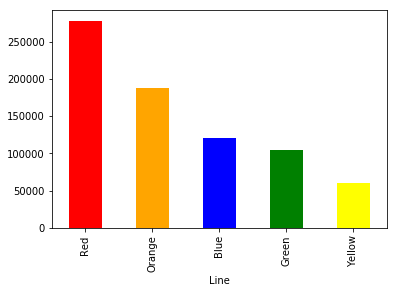

In [29]:
Ride.plot(kind='bar',x='Line',y='Rider Number', legend=None, color=['red', 'orange', 'blue', 'green', 'yellow'])

## Maryland County Population

In [30]:
d = pd.read_html('https://www.maryland-demographics.com/counties_by_population')
pop = d[0]
pop

,0,1,2
0,Rank,County,Population
1,1,Montgomery County,1039198
2,2,Prince George's County,905161
3,3,Baltimore County,828637
4,4,Anne Arundel County,564600
5,5,Howard County,312495
6,6,Harford County,250132
7,7,Frederick County,246105
8,8,Carroll County,167319
9,9,Charles County,156021


In [31]:
pop.columns=['Rank', 'County', 'Population']
pop

,Rank,County,Population
0,Rank,County,Population
1,1,Montgomery County,1039198
2,2,Prince George's County,905161
3,3,Baltimore County,828637
4,4,Anne Arundel County,564600
5,5,Howard County,312495
6,6,Harford County,250132
7,7,Frederick County,246105
8,8,Carroll County,167319
9,9,Charles County,156021


In [32]:
pop = pop.drop([0,24], axis=0)
pop

,Rank,County,Population
1,1,Montgomery County,1039198
2,2,Prince George's County,905161
3,3,Baltimore County,828637
4,4,Anne Arundel County,564600
5,5,Howard County,312495
6,6,Harford County,250132
7,7,Frederick County,246105
8,8,Carroll County,167319
9,9,Charles County,156021
10,10,Washington County,149546


In [33]:
pop['Population'] = pop['Population'].astype(float)

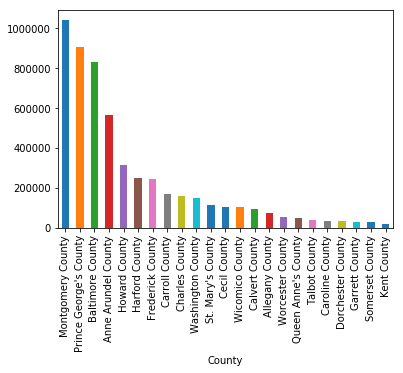

In [34]:
pop.plot(kind='bar',x='County',y='Population', legend=None)

In [35]:
data = [[0, 0], [39.1547, -77.2405], [38.7849, -76.8721], [39.4648, -76.7337],[38.9530, -76.5488],[39.2873, -76.9643],[39.5839, -76.3637],[39.3845, -77.4702],[39.5423, -77.0564],[38.5222, -77.1025], [39.6418, -77.7200]]
loc = pd.DataFrame(data, columns = ['lat', 'lng'])
loc

,lat,lng
0,0.0000,0.0000
1,39.1547,-77.2405
2,38.7849,-76.8721
3,39.4648,-76.7337
4,38.9530,-76.5488
5,39.2873,-76.9643
6,39.5839,-76.3637
7,39.3845,-77.4702
8,39.5423,-77.0564
9,38.5222,-77.1025


In [36]:
df_col = pd.concat([pop,loc], axis=1)
df_col

,Rank,County,Population,lat,lng
0,NaN,NaN,NaN,0.0000,0.0000
1,1,Montgomery County,1039198.0,39.1547,-77.2405
2,2,Prince George's County,905161.0,38.7849,-76.8721
3,3,Baltimore County,828637.0,39.4648,-76.7337
4,4,Anne Arundel County,564600.0,38.9530,-76.5488
5,5,Howard County,312495.0,39.2873,-76.9643
6,6,Harford County,250132.0,39.5839,-76.3637
7,7,Frederick County,246105.0,39.3845,-77.4702
8,8,Carroll County,167319.0,39.5423,-77.0564
9,9,Charles County,156021.0,38.5222,-77.1025


In [37]:
topten = df_col.drop([0,11,12,13,14,15,16,17,18,19,20,21,22,23], axis=0)
topten

,Rank,County,Population,lat,lng
1,1,Montgomery County,1039198.0,39.1547,-77.2405
2,2,Prince George's County,905161.0,38.7849,-76.8721
3,3,Baltimore County,828637.0,39.4648,-76.7337
4,4,Anne Arundel County,564600.0,38.9530,-76.5488
5,5,Howard County,312495.0,39.2873,-76.9643
6,6,Harford County,250132.0,39.5839,-76.3637
7,7,Frederick County,246105.0,39.3845,-77.4702
8,8,Carroll County,167319.0,39.5423,-77.0564
9,9,Charles County,156021.0,38.5222,-77.1025
10,10,Washington County,149546.0,39.6418,-77.7200


In [38]:
columns = ['Rank']
topten.drop(columns, inplace=True, axis=1)
topten

,County,Population,lat,lng
1,Montgomery County,1039198.0,39.1547,-77.2405
2,Prince George's County,905161.0,38.7849,-76.8721
3,Baltimore County,828637.0,39.4648,-76.7337
4,Anne Arundel County,564600.0,38.9530,-76.5488
5,Howard County,312495.0,39.2873,-76.9643
6,Harford County,250132.0,39.5839,-76.3637
7,Frederick County,246105.0,39.3845,-77.4702
8,Carroll County,167319.0,39.5423,-77.0564
9,Charles County,156021.0,38.5222,-77.1025
10,Washington County,149546.0,39.6418,-77.7200


The Latitude and Longitude were gathered from Google and represent the center of each county.

In [39]:
address = '100 State Cir, Annapolis, MD 21401'
#Location of the Maryland State House
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

38.97888975 -76.4910703023656


In [40]:
county_map = folium.Map(location=[latitude, longitude], zoom_start=13)

folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Maryland State House',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(county_map)


for lat, lng in zip(topten.lat, topten.lng):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(county_map)


county_map